In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv('/Users/josephlim/Desktop/Data Science/Capstone Projects/Capstone project- Spotify/Data/Cleaned Data/US_1921-2020_final.csv')

In [3]:
df.head()

artist/s                   title  duration_ms  popularity  \
0  Britney Spears  Oops!...I Did It Again       211160    0.134831   
1       blink-182    All The Small Things       167066    0.112360   
2      Faith Hill                 Breathe       250546    0.258427   
3        Bon Jovi            It's My Life       224493    0.123596   
4          *NSYNC             Bye Bye Bye       200560    0.269663   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.751   0.834    1    -5.444     0       0.0437        0.3000   
1         0.434   0.897    0    -4.918     1       0.0488        0.0103   
2         0.529   0.496    7    -9.007     1       0.0290        0.1730   
3         0.551   0.913    0    -4.063     0       0.0466        0.0263   
4         0.614   0.928    8    -4.806     0       0.0516        0.0408   

   instrumentalness  liveness  valence    tempo  
0          0.000018    0.3550    0.894   95.053  
1          0.000000    0.6120    0.684  148.726  
2          0.000000    0.2510    0.278  136.859  
3          0.000013    0.3470    0.544  119.992  
4          0.001040    0.0845    0.879  172.656

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist/s          2000 non-null   object 
 1   title             2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   popularity        2000 non-null   float64
 4   danceability      2000 non-null   float64
 5   energy            2000 non-null   float64
 6   key               2000 non-null   int64  
 7   loudness          2000 non-null   float64
 8   mode              2000 non-null   int64  
 9   speechiness       2000 non-null   float64
 10  acousticness      2000 non-null   float64
 11  instrumentalness  2000 non-null   float64
 12  liveness          2000 non-null   float64
 13  valence           2000 non-null   float64
 14  tempo             2000 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 234.5+ KB


In [5]:
# Spotify provides data for audio features.The Spotify Web API developer guide defines them as follows:

# Duration: The duration of the track in milliseconds.
# Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
# Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
# Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
# Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
# Mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
# Speechiness: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
# Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
# Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
# Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
# Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
# Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

In [6]:
# Keys are denoted as numbers, but they are categorical.0 represents C,
# and each index represents a semitone increase in key.
# Mode is also denoted as integers, but it is a binary data that indicates whether the song is a major/ minor key.
# 0 represents minor keys, while 1 represents major.

df_cat=df[['key','mode']].copy()

In [7]:
df_cat['key'].value_counts()

#  the most commonly used key is 1, which is C#.

1     267
11    199
0     198
7     197
5     182
8     173
2     158
9     157
6     154
10    129
4     126
3      60
Name: key, dtype: int64

<AxesSubplot: xlabel='key', ylabel='count'>

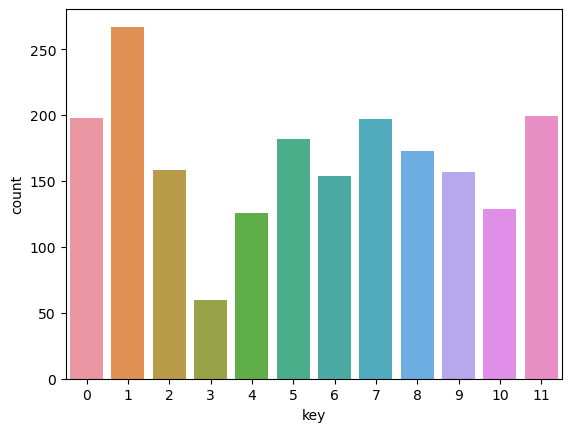

In [8]:
sns.countplot(data=df_cat, x='key')

In [9]:
df_cat['mode'].value_counts()

1    1107
0     893
Name: mode, dtype: int64

<AxesSubplot: xlabel='mode', ylabel='count'>

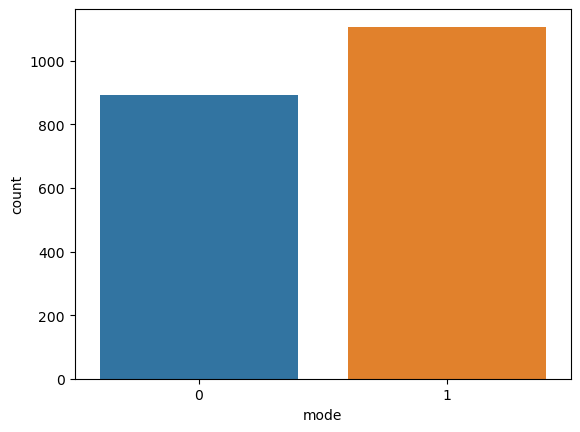

In [10]:
sns.countplot(data= df_cat, x='mode')

#  There are more songs with mode of 1, which is a major key.

In [11]:
cat_columns= df_cat.columns
df_num= df.drop(cat_columns, axis=1)

In [12]:
df_num.columns

Index(['artist/s', 'title', 'duration_ms', 'popularity', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

In [13]:
df_num.describe().T

count           mean           std            min  \
duration_ms       2000.0  228748.124500  39136.569008  113000.000000   
popularity        2000.0       0.327275      0.239726       0.000000   
danceability      2000.0       0.667438      0.140416       0.129000   
energy            2000.0       0.720366      0.152745       0.054900   
loudness          2000.0      -5.512434      1.933482     -20.514000   
speechiness       2000.0       0.103568      0.096159       0.023200   
acousticness      2000.0       0.128955      0.173346       0.000019   
instrumentalness  2000.0       0.015226      0.087771       0.000000   
liveness          2000.0       0.181216      0.140669       0.021500   
valence           2000.0       0.551690      0.220864       0.038100   
tempo             2000.0     120.122558     26.967112      60.019000   

                            25%            50%            75%         max  
duration_ms       203580.000000  223279.500000  248133.000000  484146.000  
popularity             0.179775       0.264045       0.370787       1.000  
danceability           0.581000       0.676000       0.764000       0.975  
energy                 0.622000       0.736000       0.839000       0.999  
loudness              -6.490250      -5.285000      -4.167750      -0.276  
speechiness            0.039600       0.059850       0.129000       0.576  
acousticness           0.014000       0.055700       0.176250       0.976  
instrumentalness       0.000000       0.000000       0.000068       0.985  
liveness               0.088100       0.124000       0.241000       0.853  
valence                0.386750       0.557500       0.730000       0.973  
tempo                 98.985750     120.021500     134.265500     210.851

In [14]:
df_num.shape

(2000, 13)

In [15]:
df_newind=df_num.set_index('title')

In [16]:
df_newind.sort_values('popularity', ascending=False)

artist/s  duration_ms  popularity  \
title                                                                     
More Than You Know          Axwell /\ Ingrosso       203000    1.000000   
Maps                                  Maroon 5       189840    1.000000   
Collard Greens                     ScHoolboy Q       299960    1.000000   
DNA.                            Kendrick Lamar       185946    1.000000   
Here's to Never Growing Up       Avril Lavigne       214080    1.000000   
...                                        ...          ...         ...   
The Real Slim Shady                     Eminem       284200    0.033708   
lovely (with Khalid)             Billie Eilish       200185    0.033708   
Without Me                              Eminem       290320    0.022472   
Another Love                         Tom Odell       244360    0.011236   
Sweater Weather              The Neighbourhood       240400    0.000000   

                            danceability  energy  loudness  speechiness  \
title                                                                     
More Than You Know                 0.645   0.741    -4.989       0.0339   
Maps                               0.737   0.723    -5.510       0.0295   
Collard Greens                     0.826   0.571    -4.871       0.0640   
DNA.                               0.636   0.517    -6.759       0.3600   
Here's to Never Growing Up         0.483   0.871    -3.084       0.1010   
...                                  ...     ...       ...          ...   
The Real Slim Shady                0.949   0.661    -4.244       0.0572   
lovely (with Khalid)               0.351   0.296   -10.109       0.0333   
Without Me                         0.908   0.669    -2.827       0.0738   
Another Love                       0.445   0.537    -8.532       0.0400   
Sweater Weather                    0.612   0.807    -2.810       0.0336   

                            acousticness  instrumentalness  liveness  valence  \
title                                                                           
More Than You Know               0.03230          0.000000    0.2900    0.534   
Maps                             0.01790          0.000000    0.0675    0.893   
Collard Greens                   0.02390          0.000007    0.2070    0.666   
DNA.                             0.00402          0.000000    0.0874    0.394   
Here's to Never Growing Up       0.01500          0.000000    0.4150    0.716   
...                                  ...               ...       ...      ...   
The Real Slim Shady              0.03020          0.000000    0.0454    0.760   
lovely (with Khalid)             0.93400          0.000000    0.0950    0.120   
Without Me                       0.00286          0.000000    0.2370    0.662   
Another Love                     0.69500          0.000017    0.0944    0.131   
Sweater Weather                  0.04950          0.017700    0.1010    0.398   

                              tempo  
title                                
More Than You Know          123.070  
Maps                        120.003  
Collard Greens              153.972  
DNA.                        139.928  
Here's to Never Growing Up  164.986  
...                             ...  
The Real Slim Shady         104.504  
lovely (with Khalid)        115.284  
Without Me                  112.238  
Another Love                122.769  
Sweater Weather             124.053  

[2000 rows x 12 columns]

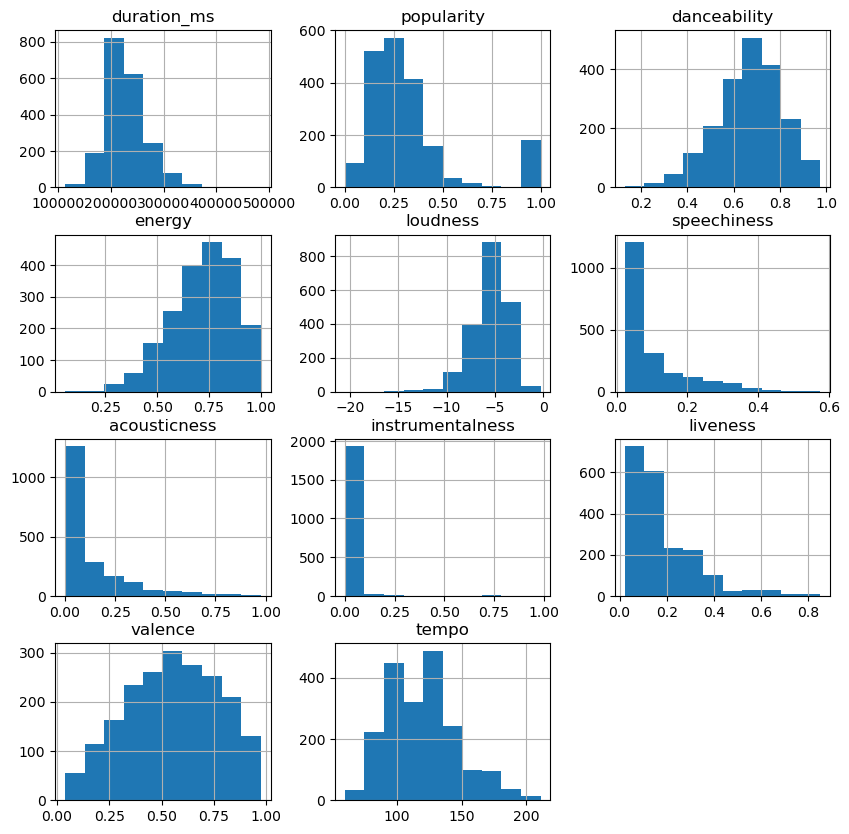

In [17]:
hist= df_newind.hist(bins=10, figsize=(10,10))

# I see some correlation in danceability, loudness, and energy. 
# It makes sense, since dancing is more closely associated with higher energy (which is associated with loudness.
# There also seems to be an inverse relationship between the duration 
# and the popularity of the song(higher the value, more popular the song).
# There is also a correlation in duration and tempo, acousticness and liveness.
# Slower the song, shorter the song has to be to retain listener's attention. 
# Most tracks released are neither live nor acoustic recordings.

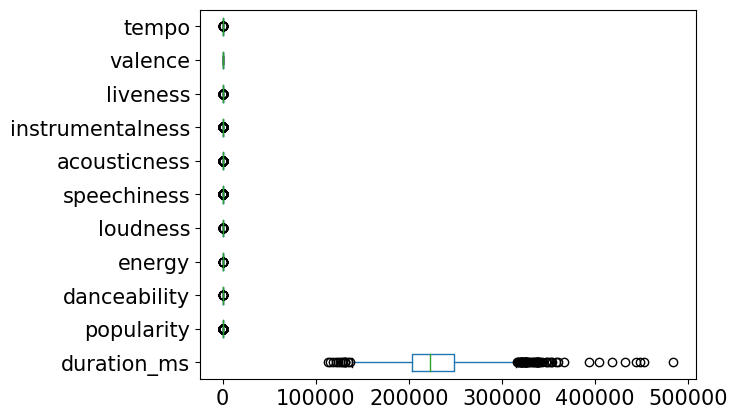

In [18]:
boxplot= df_newind.boxplot(grid=False, vert=False, fontsize=15)
# Seems like number of the songs are around 10k ms or 20-40k ms long

In [19]:
df_nodur= df_newind.drop('duration_ms', axis=1)

In [20]:
df_nodur.columns

Index(['artist/s', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

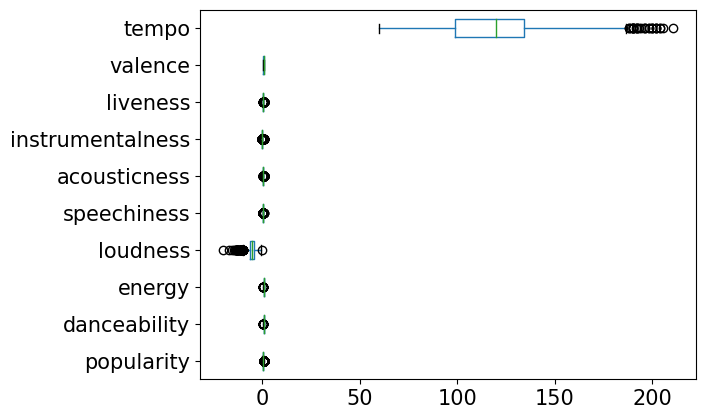

In [21]:
boxplo_nodur= df_nodur.boxplot(grid=False, vert=False, fontsize=15)
# Most songs in the top quartile tend to be on the faster end, with some outliers faster than 200BPM.

In [22]:
df_notemp= df_nodur.drop('tempo', axis=1)

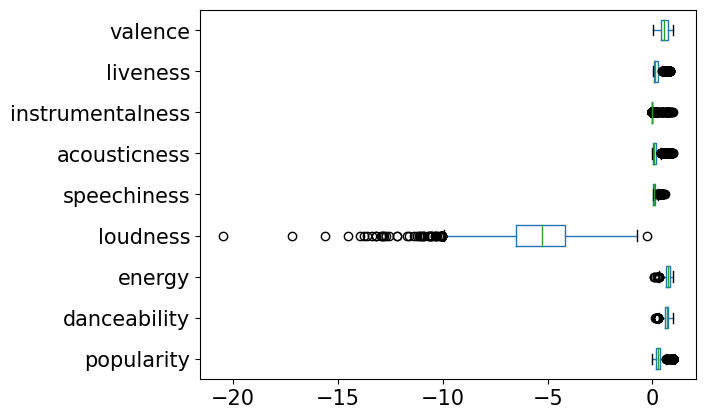

In [23]:
boxplot_notemp=df_notemp.boxplot(grid=False, vert= False, fontsize=15)
# Makes sense that most songs have loudness around -14 to -10dB, 
# as the Spotify's guideline for loudness is around -14dB. 

In [24]:
df_num[df_num['loudness']==df_num['loudness'].max()]

artist/s            title  duration_ms  popularity  danceability  energy  \
971  La Roux  In For The Kill       248626    0.337079         0.629   0.969   

     loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
971    -0.276       0.0455       0.00184               0.0     0.122    0.905   

      tempo  
971  150.01

In [25]:
df_num[df_num['loudness']==df_num['loudness'].min()]

artist/s                                              title  \
1492  Ed Sheeran  I See Fire - From "The Hobbit - The Desolation...   

      duration_ms  popularity  danceability  energy  loudness  speechiness  \
1492       300840    0.202247         0.581  0.0549   -20.514       0.0397   

      acousticness  instrumentalness  liveness  valence    tempo  
1492         0.559               0.0    0.0718    0.234  152.037

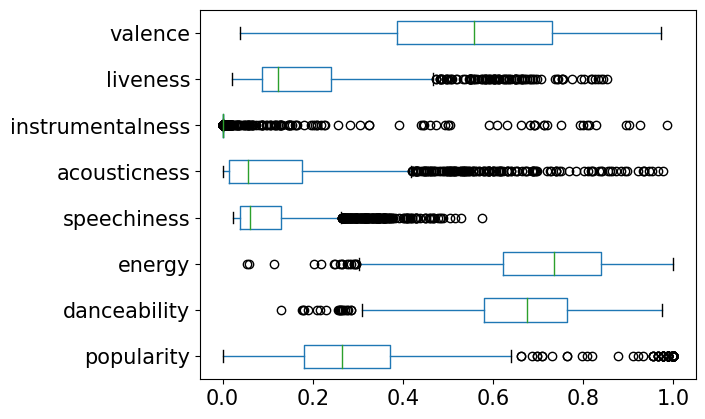

In [26]:
df_noloud= df_notemp.drop('loudness', axis=1)
boxplot_noloud= df_noloud.boxplot(grid=False, vert=False, fontsize=15)

In [27]:
df_num[df_num['instrumentalness']==df_num['instrumentalness'].max()]

artist/s      title  duration_ms  popularity  danceability  energy  \
26   Darude  Sandstorm       225493    0.224719         0.528   0.965   

    loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
26    -7.984       0.0465         0.141             0.985    0.0797    0.587   

      tempo  
26  136.065

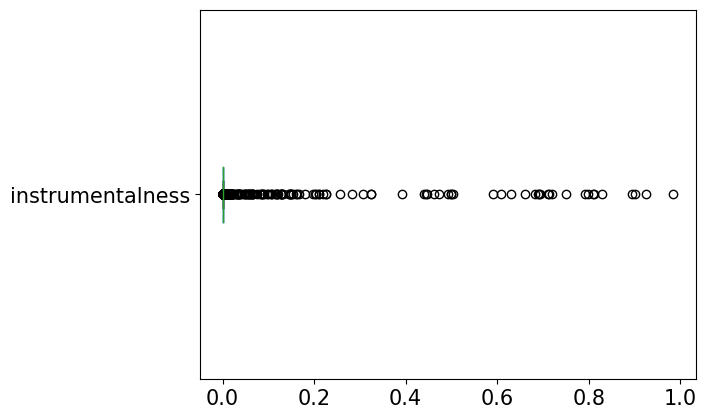

In [28]:
boxplot_inst= df_noloud.boxplot(column='instrumentalness', grid=False, vert=False, fontsize=15)

In [29]:
df_num['instrumentalness'].value_counts()

# These are a lot of zeros 
# (which indicates no probability that the track is an instrumental,without singing/ rappingvocals). 
# This makes sense, since top charting songs are more likely to be songs than instrumentals.

0.000000    1087
0.001300       3
0.000108       3
0.000002       3
0.000139       3
            ... 
0.001090       1
0.000409       1
0.000009       1
0.000166       1
0.002440       1
Name: instrumentalness, Length: 772, dtype: int64

/var/folders/z9/t15ddpld70nc5qf41442lpr80000gn/T/ipykernel_1446/3874422843.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'duration_ms'),
  Text(0, 1.5, 'popularity'),
  Text(0, 2.5, 'danceability'),
  Text(0, 3.5, 'energy'),
  Text(0, 4.5, 'key'),
  Text(0, 5.5, 'loudness'),
  Text(0, 6.5, 'mode'),
  Text(0, 7.5, 'speechiness'),
  Text(0, 8.5, 'acousticness'),
  Text(0, 9.5, 'instrumentalness'),
  Text(0, 10.5, 'liveness'),
  Text(0, 11.5, 'valence'),
  Text(0, 12.5, 'tempo')])

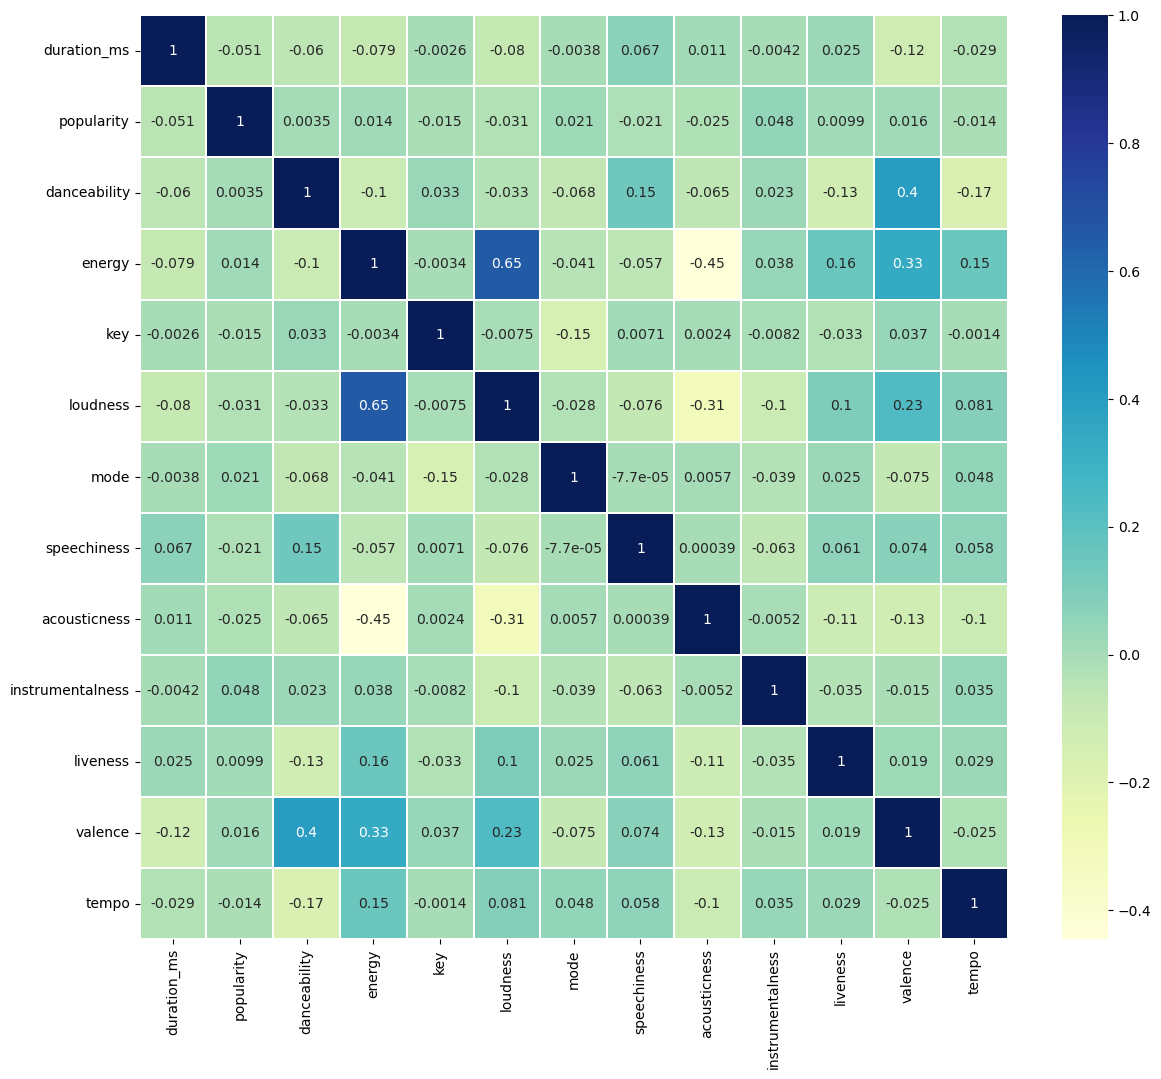

In [30]:
# Heatmap to visualize data relationships
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

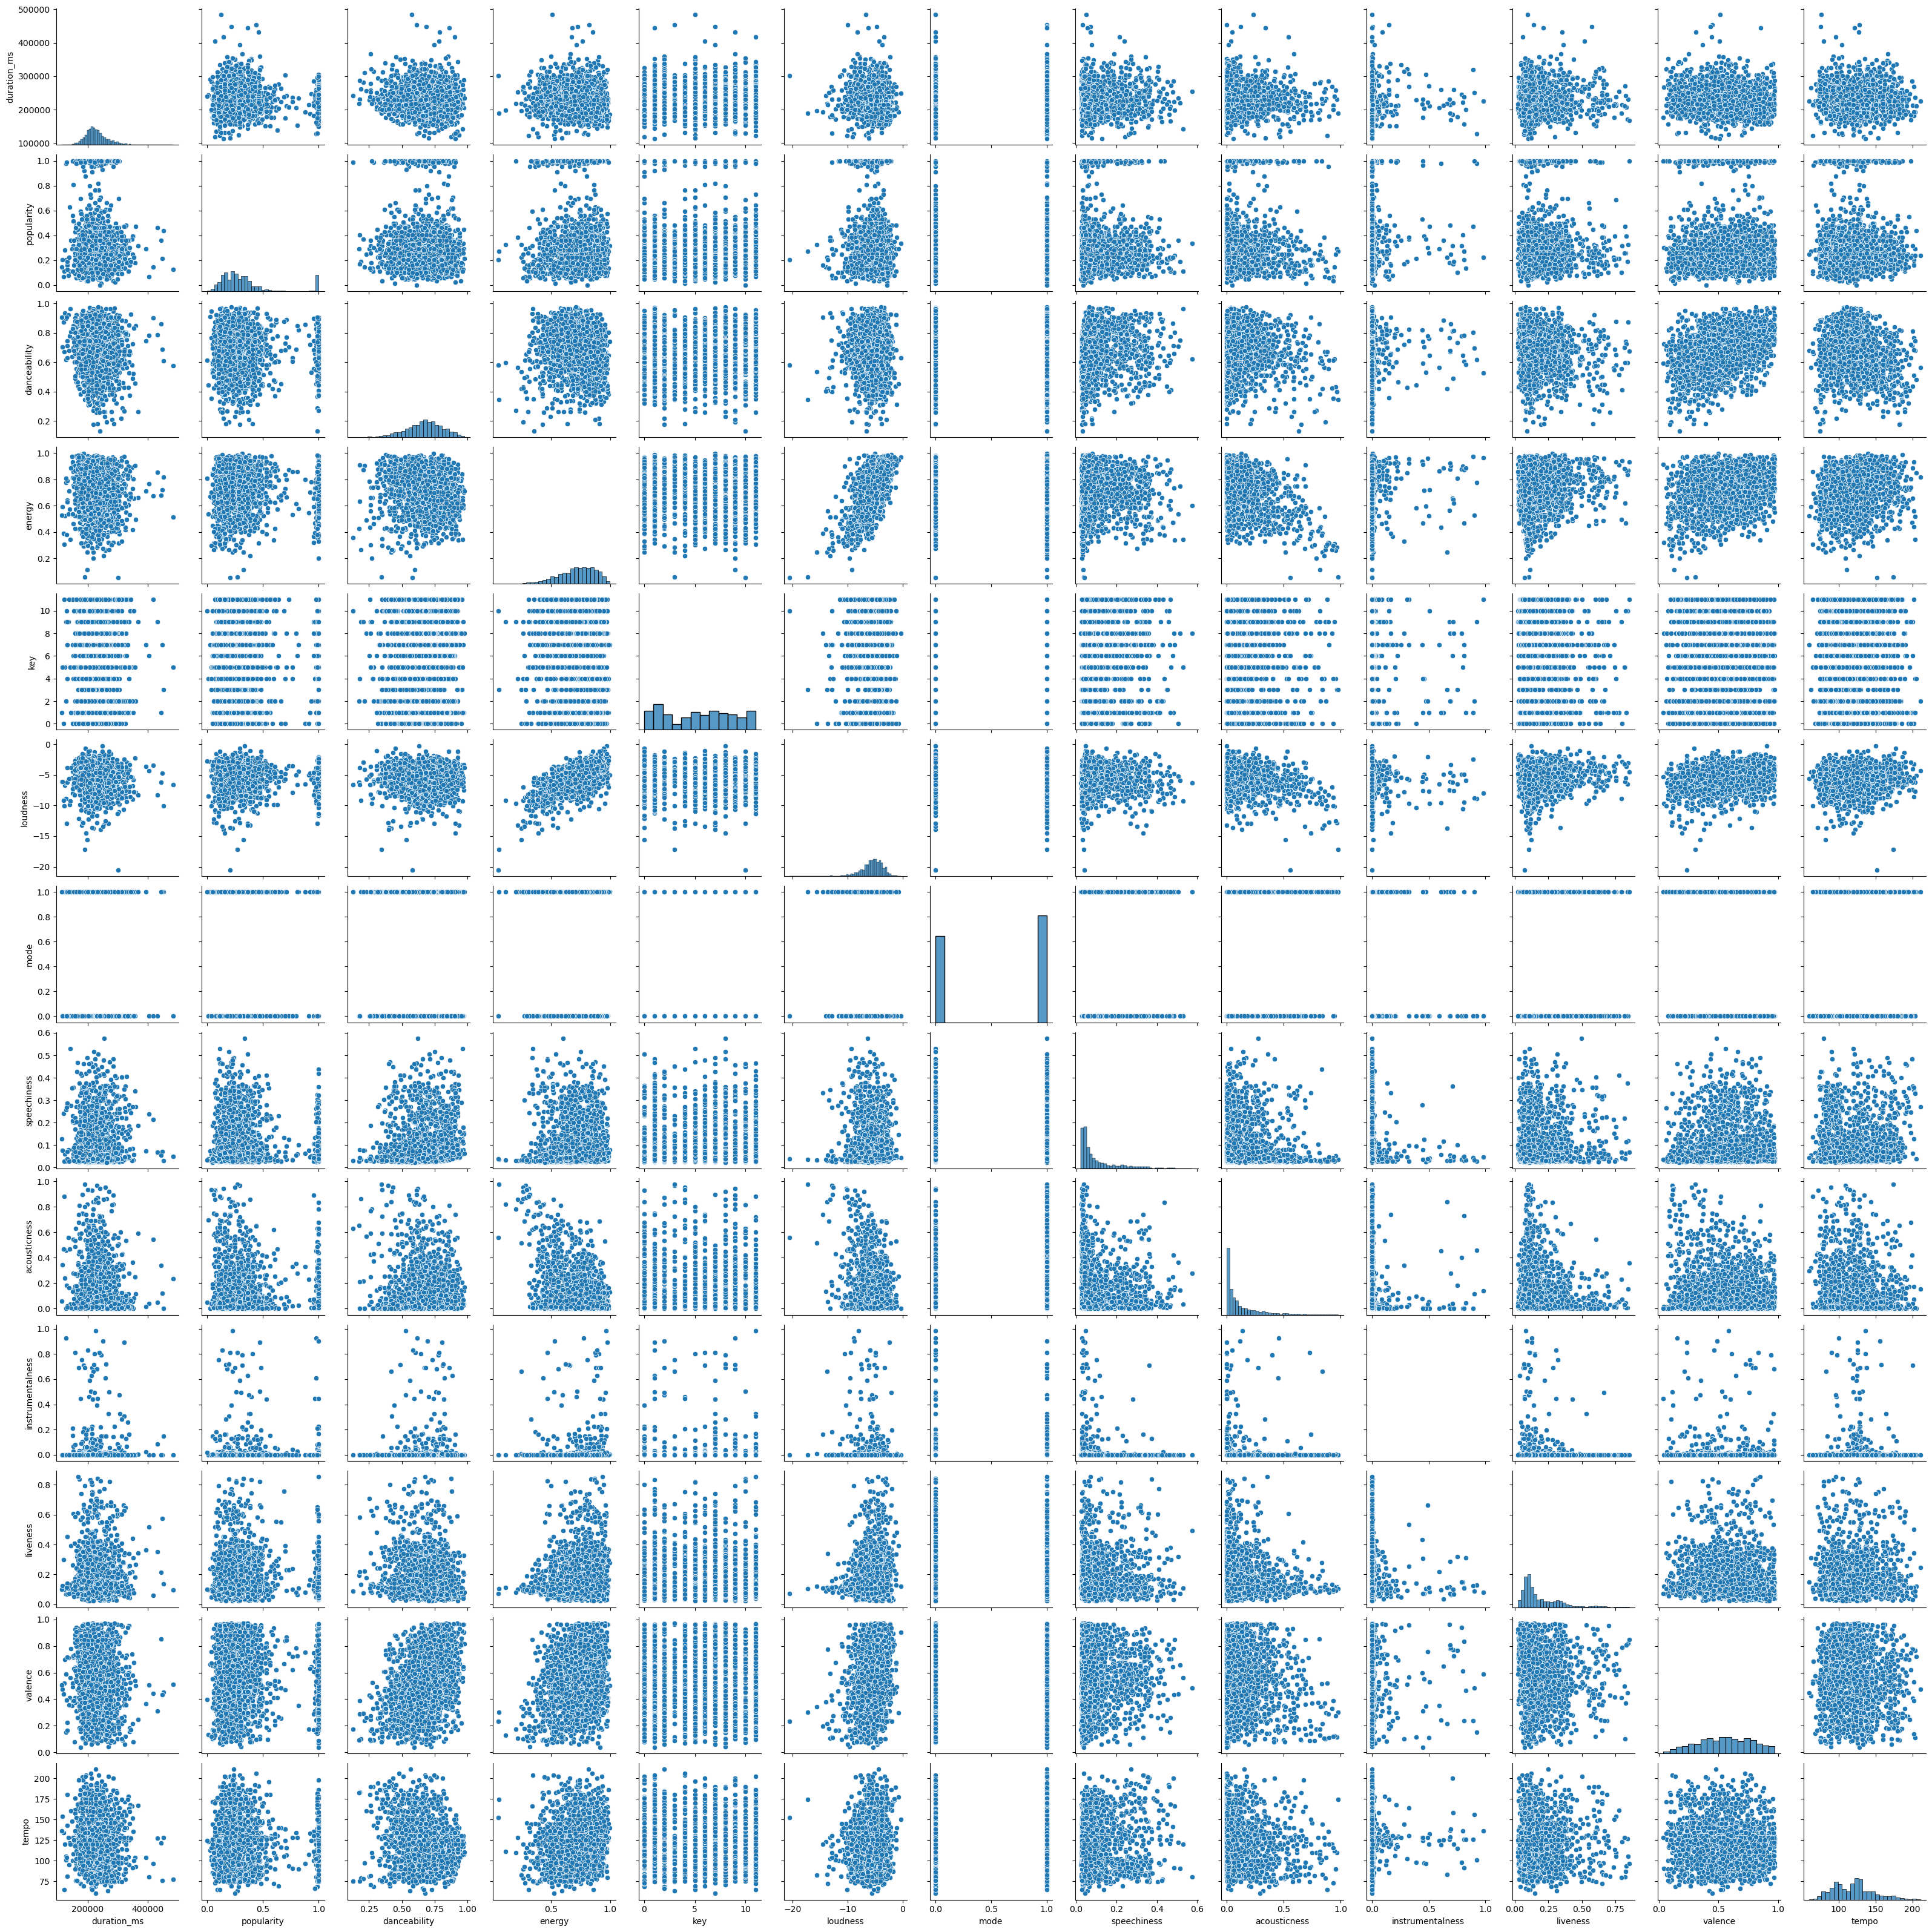

In [31]:
g= sns.pairplot(df)

# There isn't any particular feature that has significant correlation with popularity.
# Instrumentalness has the highest positive correlation with popularity with 0.048
# There is a medium correlation between ernergy and loudness